# SIMULACIÓN | LABORATORIO 3



### CONTENIDOS
1. Histogramas y Distribución empírica
2. Estimadores de máxima verosimilitud
3. Test de bondad de ajuste 

In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from IPython.display import display
import ipywidgets as widgets
from IPython.core.pylabtools import figsize

def ecdf(data):
    x = np.sort(data)
    n = x.size
    y = np.arange(1, n+1) / n
    return(x,y)

<IPython.core.display.Javascript object>


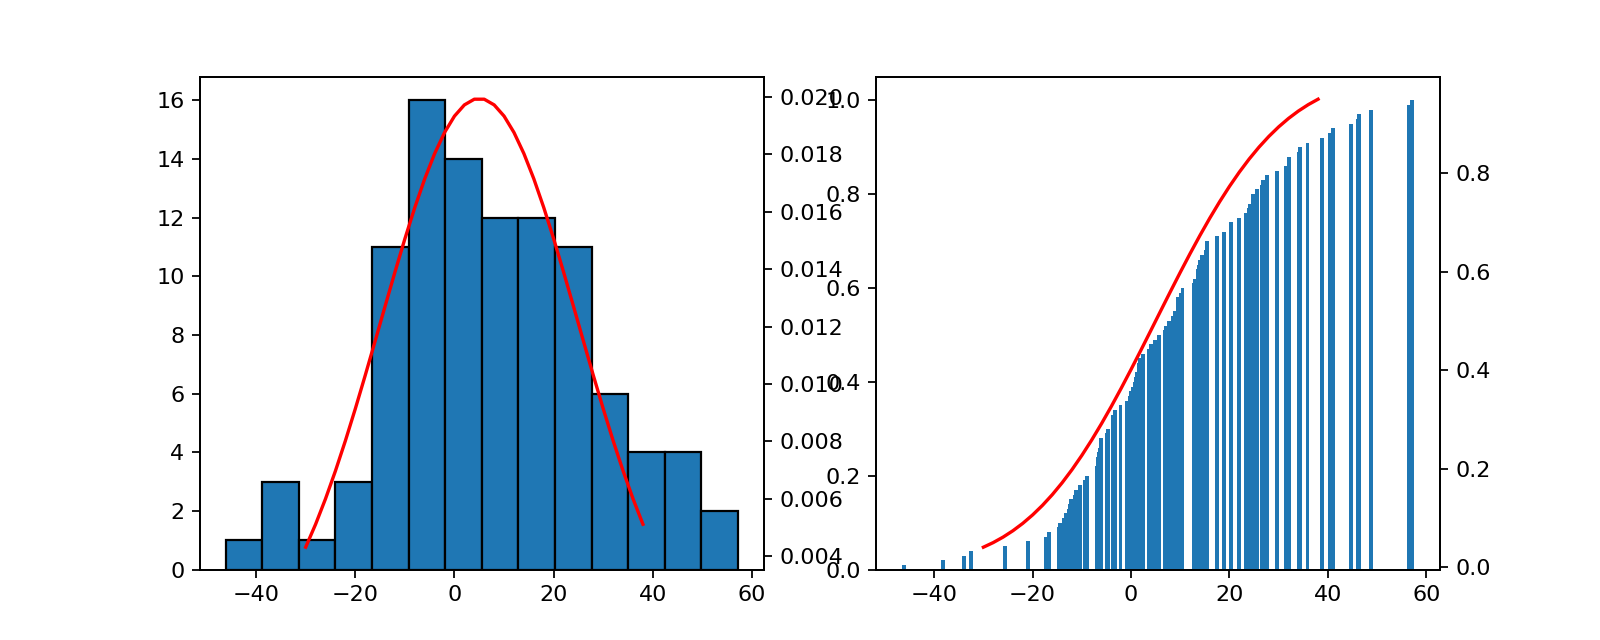

In [2]:
# Distribución normal

# Media
mu = 5

# Varianza
sigma = 20

# Distribucion normal simulada
datos = stats.norm.rvs(loc=mu, scale=sigma, size=100)

# Histograma de los datos
fig, axs = plt.subplots(1, 2,figsize=(10, 4), dpi=80)
axs[0].hist(datos, edgecolor = 'black', bins = int(70/5))
ax1 = axs[0].twinx()

# Genera arreglo de probabilidades
vec = range(-30,40,2)
dvec = []
for i in vec:
    dvec.append(stats.norm.pdf(x=i, loc=mu, scale=sigma))
ax1.plot(vec,dvec,color='red')

# Dist P Acumulada simulada
x,cum_norm = ecdf(datos)
axs[1].bar(x,cum_norm)

# Dist P Acumulada teórica
ax2 = axs[1].twinx()
pvec = []
for i in vec:
    pvec.append(stats.norm.cdf(x=i, loc=mu, scale=sigma))
ax2.plot(vec,pvec,color='red')
plt.draw()

<IPython.core.display.Javascript object>


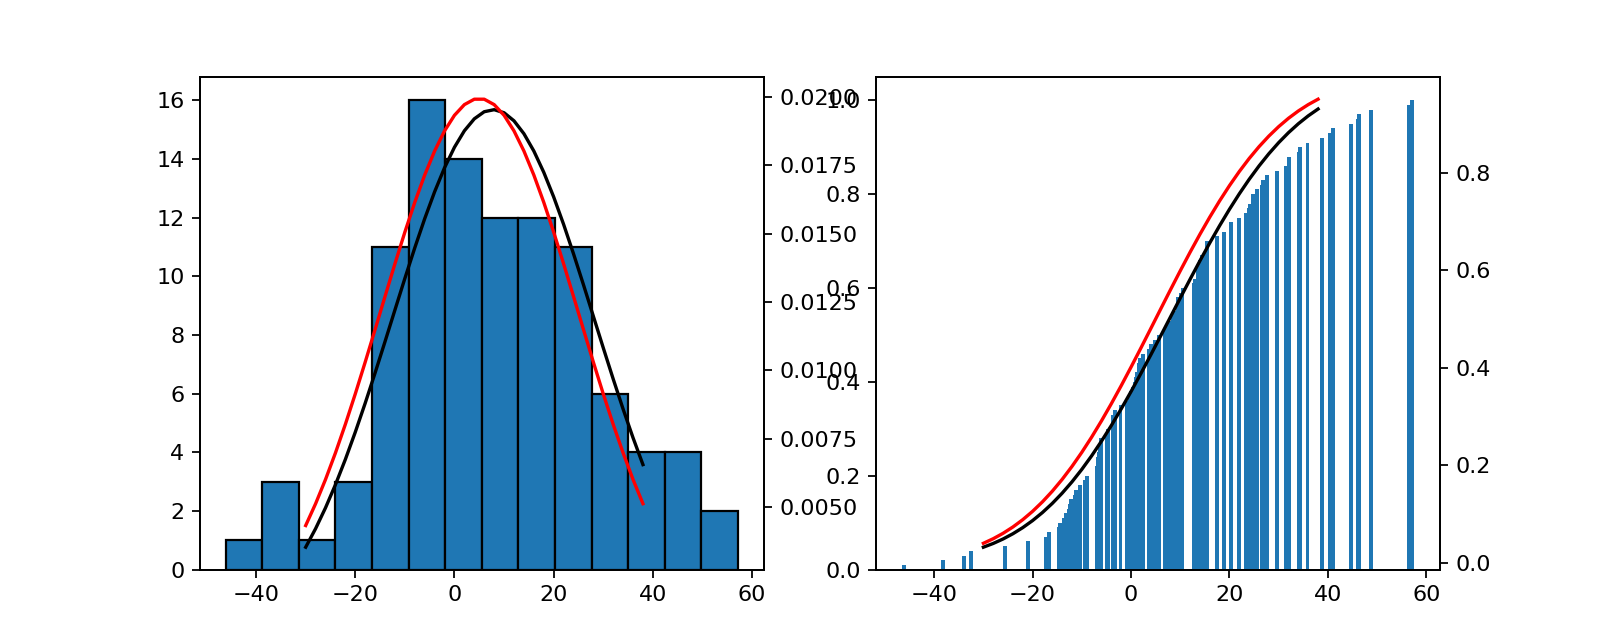

In [3]:
## Calculemos ahora los estimadores máximo verosímiles y veamos como quedan las curvas
mu0,sigma0 = stats.norm.fit(datos)

# Grafica dist P normal con la media y varianza de los datos simulados
fig, axs = plt.subplots(1, 2,figsize=(10, 4), dpi=80)
axs[0].hist(datos, edgecolor = 'black', bins = int(70/5))
ax1 = axs[0].twinx()
dvec0 = []
for i in vec:
    dvec0.append(stats.norm.pdf(x=i, loc=mu0, scale=sigma0))
    
ax1.plot(vec,dvec0,color='black')
ax1.plot(vec,dvec,color='red')

axs[1].bar(x,cum_norm)
## Probabilidad teórica
ax2 = axs[1].twinx()
pvec0 = []
for i in vec:
    pvec0.append(stats.norm.cdf(x=i, loc=mu0, scale=sigma0))
ax2.plot(vec,pvec0,color='black')   
ax2.plot(vec,pvec,color='red')
plt.draw()

In [4]:
## Utilicemos ahora el test de K-S para probar el ajuste de datos
## respecto de la distribución teórica?
stats.kstest(datos, 'norm')

KstestResult(statistic=0.5410819195478085, pvalue=6.105359845104496e-28)

In [5]:
## Utilicemos ahora el test de K-S para probar el ajuste de datos
## respecto de la distribución teórica?
stats.kstest(datos, 'norm', args=(mu, sigma))

KstestResult(statistic=0.08379580890062822, pvalue=0.45908947893609964)

In [6]:
## Respecto de la distribución con los parámetros MV?
stats.kstest(datos, 'norm', args=(mu0, sigma0))

KstestResult(statistic=0.06706877488410357, pvalue=0.7335699688796167)

In [7]:
## Comparando con una nueva muestra extraida de la distribución con los parámetros MV?
datos2 = stats.norm.rvs(loc=mu0, scale= sigma0,size=1000)
stats.kstest(datos, datos2)

KstestResult(statistic=0.077, pvalue=0.631105588922221)

#### Ejercicio1: 
Repita el ejercicio con:

(i) una muestra de datos simulados de una v.a. discreta de su elección

<IPython.core.display.Javascript object>


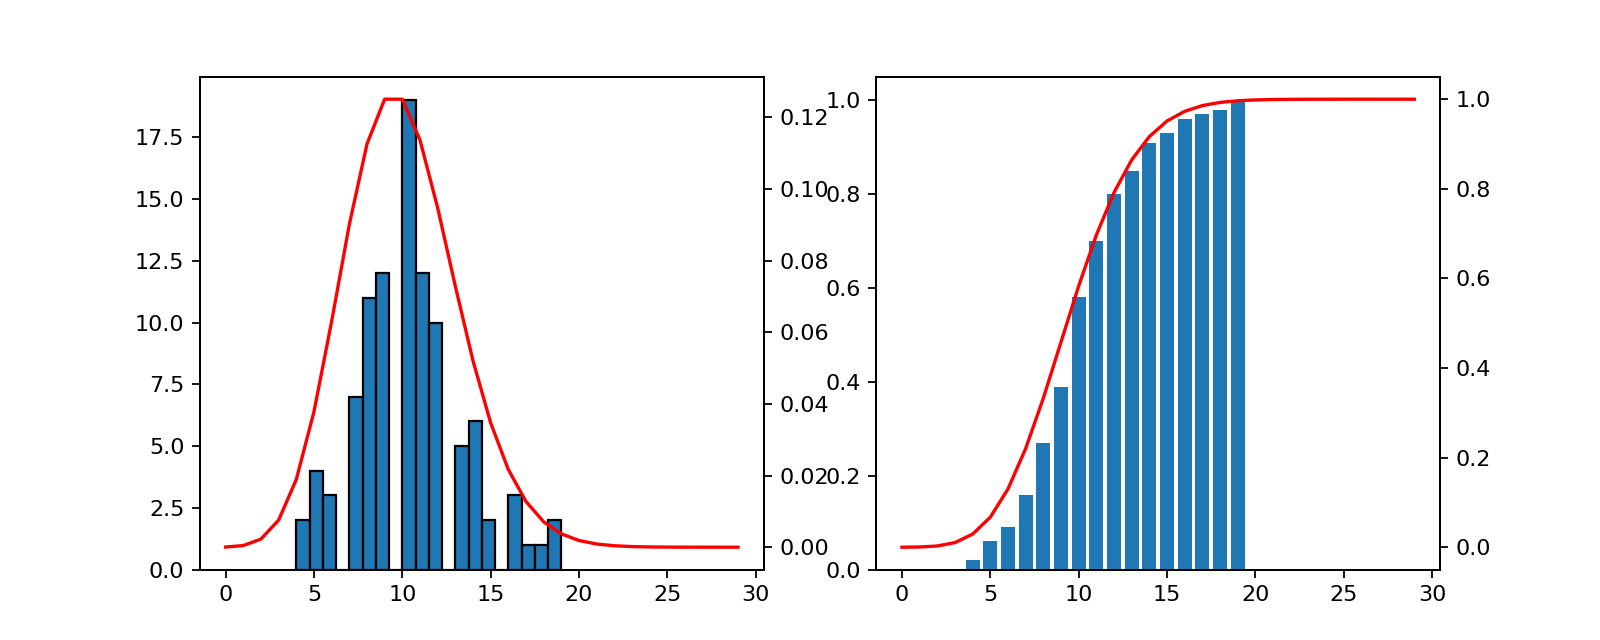

In [8]:
# Distribución poisson

# Media
mu = 10

# Distribucion normal simulada
datos = stats.poisson.rvs(mu=mu, size=100)

# Histograma de los datos
fig, axs = plt.subplots(1,2,figsize=(10, 4), dpi=80)
axs[0].hist(datos, edgecolor = 'black', bins = 20)
ax1 = axs[0].twinx()

# Genera arreglo de probabilidades
vec = range(0,30,1)
dvec = []
for i in vec:
    dvec.append(stats.poisson.pmf(k=i, mu=mu))
ax1.plot(vec,dvec,color='red')

# Dist P Acumulada simulada
x,cum_poiss = ecdf(datos)
axs[1].bar(x,cum_poiss)

# Dist P Acumulada teórica
ax2 = axs[1].twinx()
pvec = []
for i in vec:
    pvec.append(stats.poisson.cdf(k=i, mu=mu))
ax2.plot(vec,pvec,color='red')
plt.draw()

In [9]:
# Obtenemos media a partir de los datos simulados
mu0 = np.mean(datos)

In [10]:
# Utilizando un mu diferente al de la distribución original
stats.kstest(datos, 'poisson', args=(1,0))

KstestResult(statistic=0.9963401531726563, pvalue=4.439366035225248e-244)

In [11]:
# Utilizando el mu de la distribución generadora
stats.kstest(datos, 'poisson', args=(mu,0))

KstestResult(statistic=0.19303975019298514, pvalue=0.0009723100428876345)

In [12]:
# Utilizando el mu de los datos simulados
stats.kstest(datos, 'poisson', args=(mu0,0))

KstestResult(statistic=0.15182704269261615, pvalue=0.0177297384735938)

In [13]:
## Comparando con una nueva muestra extraida de la distribución con los parámetros MV?
datos2 = stats.poisson.rvs(mu=mu0,size=1000)
stats.kstest(datos, datos2)

KstestResult(statistic=0.051, pvalue=0.9644405378528937)

In [ ]:
FALTA DESARROLLO

(ii) una muestra de datos simulados de una v.a. continua de su elección (distinta de la normal)

<IPython.core.display.Javascript object>


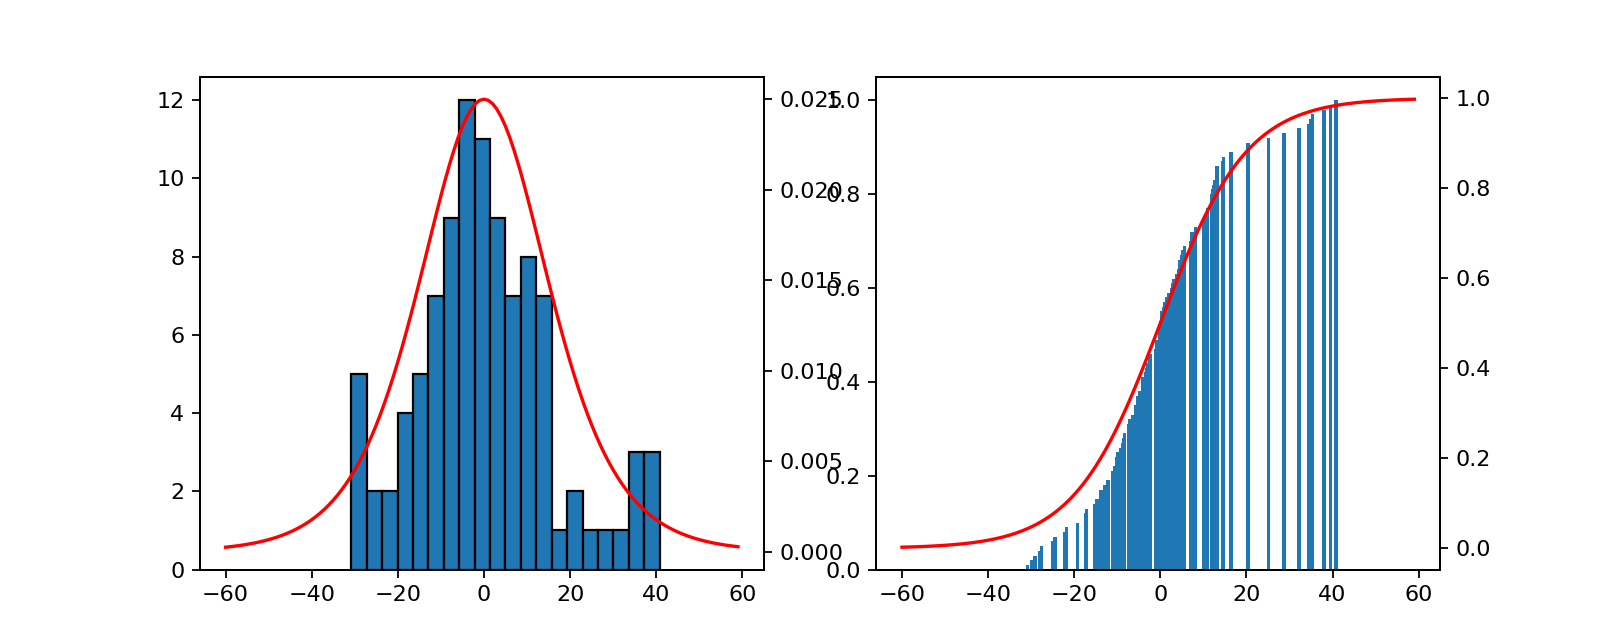

In [18]:
# Parámetros distribución logística
loc = 0
scale = 10

# Distribucion logística simulada
datos = stats.logistic.rvs(loc=loc,scale=scale,size=100)

# Histograma de los datos
fig, axs = plt.subplots(1,2,figsize=(10, 4), dpi=80)
axs[0].hist(datos, edgecolor = 'black', bins = 20)
ax1 = axs[0].twinx()

# Genera arreglo de probabilidades
vec = range(-60,60,1)
dvec = []
for i in vec:
    dvec.append(stats.logistic.pdf(x=i, loc=loc, scale=scale))
ax1.plot(vec,dvec,color='red')

# Dist P Acumulada simulada
x,cum_logistic = ecdf(datos)
axs[1].bar(x,cum_logistic)

# Dist P Acumulada teórica
ax2 = axs[1].twinx()
pvec = []
for i in vec:
    pvec.append(stats.logistic.cdf(x=i, loc=loc, scale=scale))
ax2.plot(vec,pvec,color='red')
plt.draw()

In [21]:
# Obtiene parámetros de la simulación
args = stats.logistic.fit(datos)

In [22]:
# Utilizando un parámetros diferentes al de la distribución original
stats.kstest(datos, 'logistic', args=(0,1))

KstestResult(statistic=0.045985161935746866, pvalue=0.977657829842451)

In [25]:
# Utilizando parámetros de la distribución generadora
stats.kstest(datos,'logistic', args=(loc,scale))

KstestResult(statistic=0.07087696939527288, pvalue=0.6698831549702928)

In [26]:
# Utilizando el de los datos simulados
stats.kstest(datos, 'logistic', args=args)

KstestResult(statistic=0.045985161935746866, pvalue=0.977657829842451)

In [27]:
## Comparando con una nueva muestra extraida de la distribución con los parámetros MV?
datos2 = stats.logistic.rvs(loc=args[0],scale=args[1],size=1000)
stats.kstest(datos, datos2)

KstestResult(statistic=0.054, pvalue=0.9432520313377557)

In [55]:
## Analizaremos que ocurre con datos reales
from datetime import datetime, timedelta
datos = pd.read_csv("data/grandesSismos.csv")
datos.head()

,Fecha_local,Fecha_local1,Hora_local,Latitud,Longitud,Magnitud_Ms
0,08-02-1570,08-02-1570,9:00,-36.8,-73.00,8.3
1,17-03-1575,17-03-1575,10:00,-33.4,-70.60,7.3
2,16-12-1575,16-12-1575,14:30,-39.8,-73.20,8.5
3,24-11-1604,24-11-1604,12:30,-18.5,-70.40,8.5
4,16-09-1615,16-09-1615,23:30,-18.5,-70.35,8.8


In [56]:
# Calcula cantidad de días entre eventos
vec1 = datos['Fecha_local']
dtpo = []
ind = list(range(112))
for i in ind:
    fecha1 = datetime.strptime(vec1[i], '%d-%m-%Y')
    fecha2 = datetime.strptime(vec1[i+1], '%d-%m-%Y')
    num = fecha2-fecha1
    num = num/timedelta(days=1)
    dtpo.append(num)

<IPython.core.display.Javascript object>


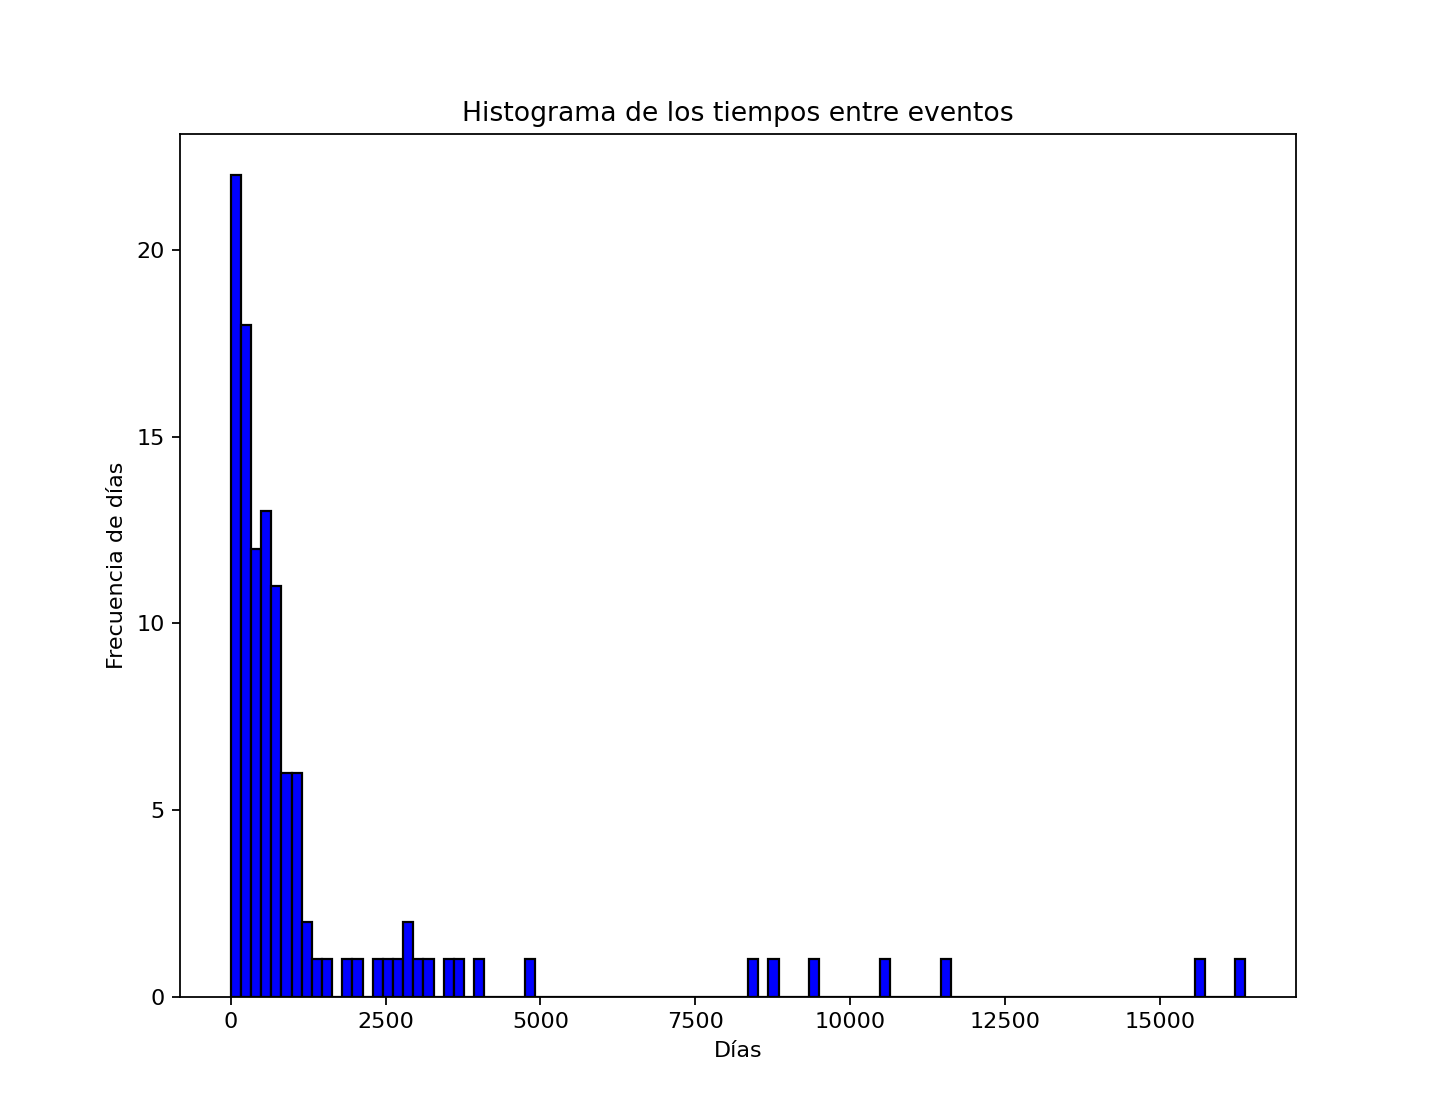

In [57]:
fig, ax = plt.subplots(1, 1,figsize=(9,7), dpi=80)

# Hacer histograma usando matplotlib, los bins deben ser enteros
# Agrega texto
ax.hist(dtpo, color = 'blue', edgecolor = 'black',bins=100)
ax.set_title('Histograma de los tiempos entre eventos')
ax.set_xlabel('Días'); 
ax.set_ylabel('Frecuencia de días');
#plt.show()

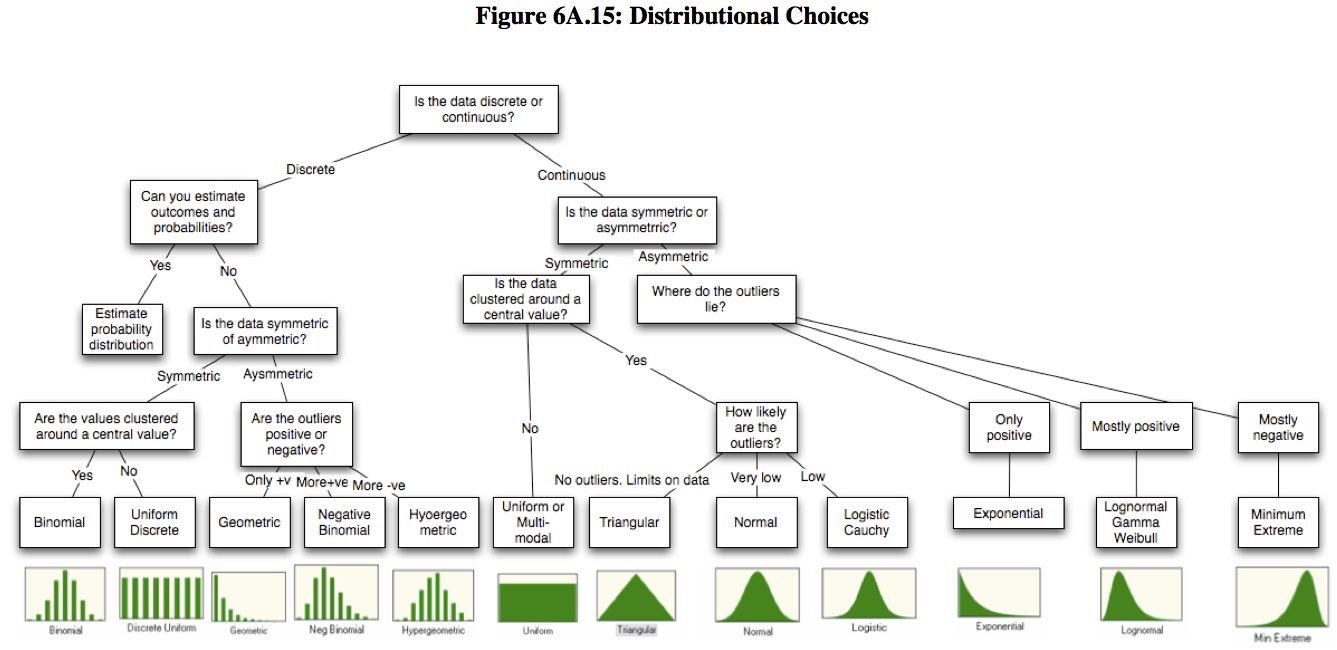

<IPython.core.display.Javascript object>


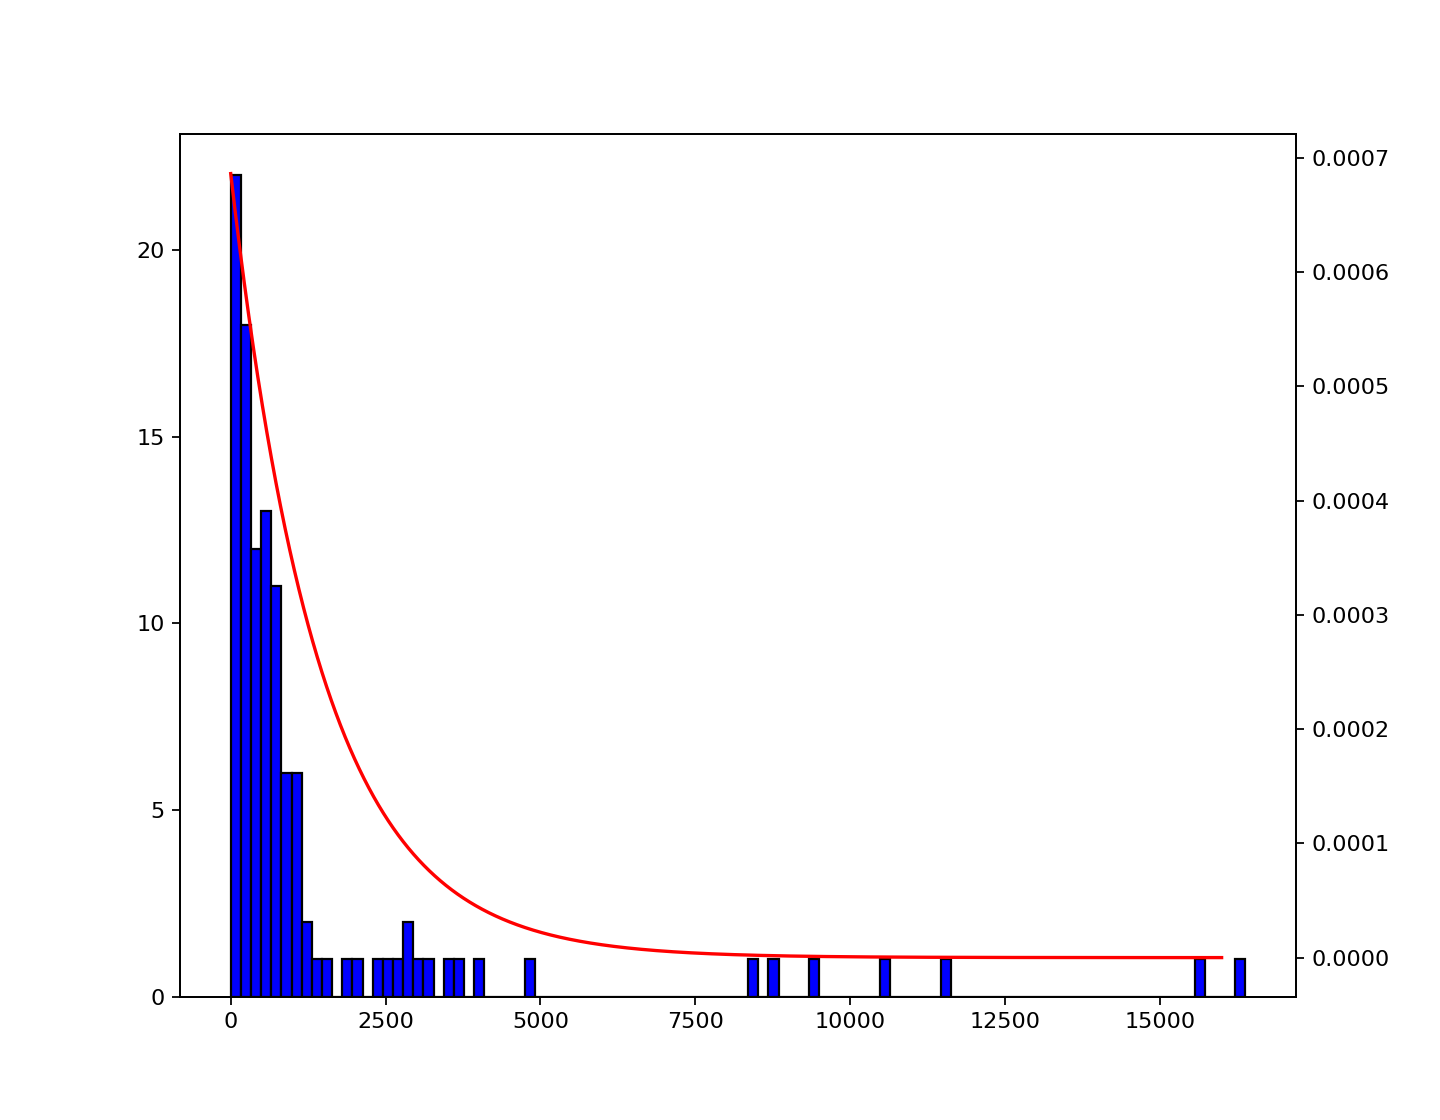

(0.0, 1457.3125)


In [58]:
# Ajuste de distribución exponencial considerando Estimadores de MV
fig, ax = plt.subplots(1, 1,figsize=(9,7), dpi=80)
ax.hist(dtpo, color = 'blue', edgecolor = 'black',bins=100)
ax2 = ax.twinx()
args = stats.expon.fit(dtpo)
print(args)
vec = list(range(16000))
pvec = []
for i in vec:
    pvec.append(stats.expon.pdf(x=i,scale=args[1],loc=args[0]))
    
ax2.plot(vec,pvec, color='red')
plt.draw()

In [59]:
datos2 = stats.expon.rvs(*args,size=114)
print(stats.kstest(dtpo, datos2))
dtpo = np.array(dtpo)

KstestResult(statistic=0.3125, pvalue=1.8949868987205853e-05)


#### Ejercicio 2:

(i) Interprete el resultado. ¿Qué otros modelos es razonable considerar? ¿Qué filtro en los datos podría mejorar el ajuste?

Tomando en cuenta la naturaleza del problema y que los datos son discretos, tiene sentido considerar la distribucion de poisson, ya que estamos viendo cada cuánto tiempo ocurre un fenómeno. Por otro lado, viendo la forma del histograma tiene sentido utilizar la distribución geométrica.

Todos los casos en que hay diferencias de más de 5000 días corresponden a sismos ocurridos en los siglos XVI y XVII. Creemos que puede haber un sesgo en la observación, ya que el progreso económico y tecnológico de los últimos siglos nos ha permitido tener más herramientas para observar una mayor cantidad de sismos con mayor precisión.

(ii) Desarrolle alguno de los análisis propuestos en (i). Comente sus resultados.

<IPython.core.display.Javascript object>


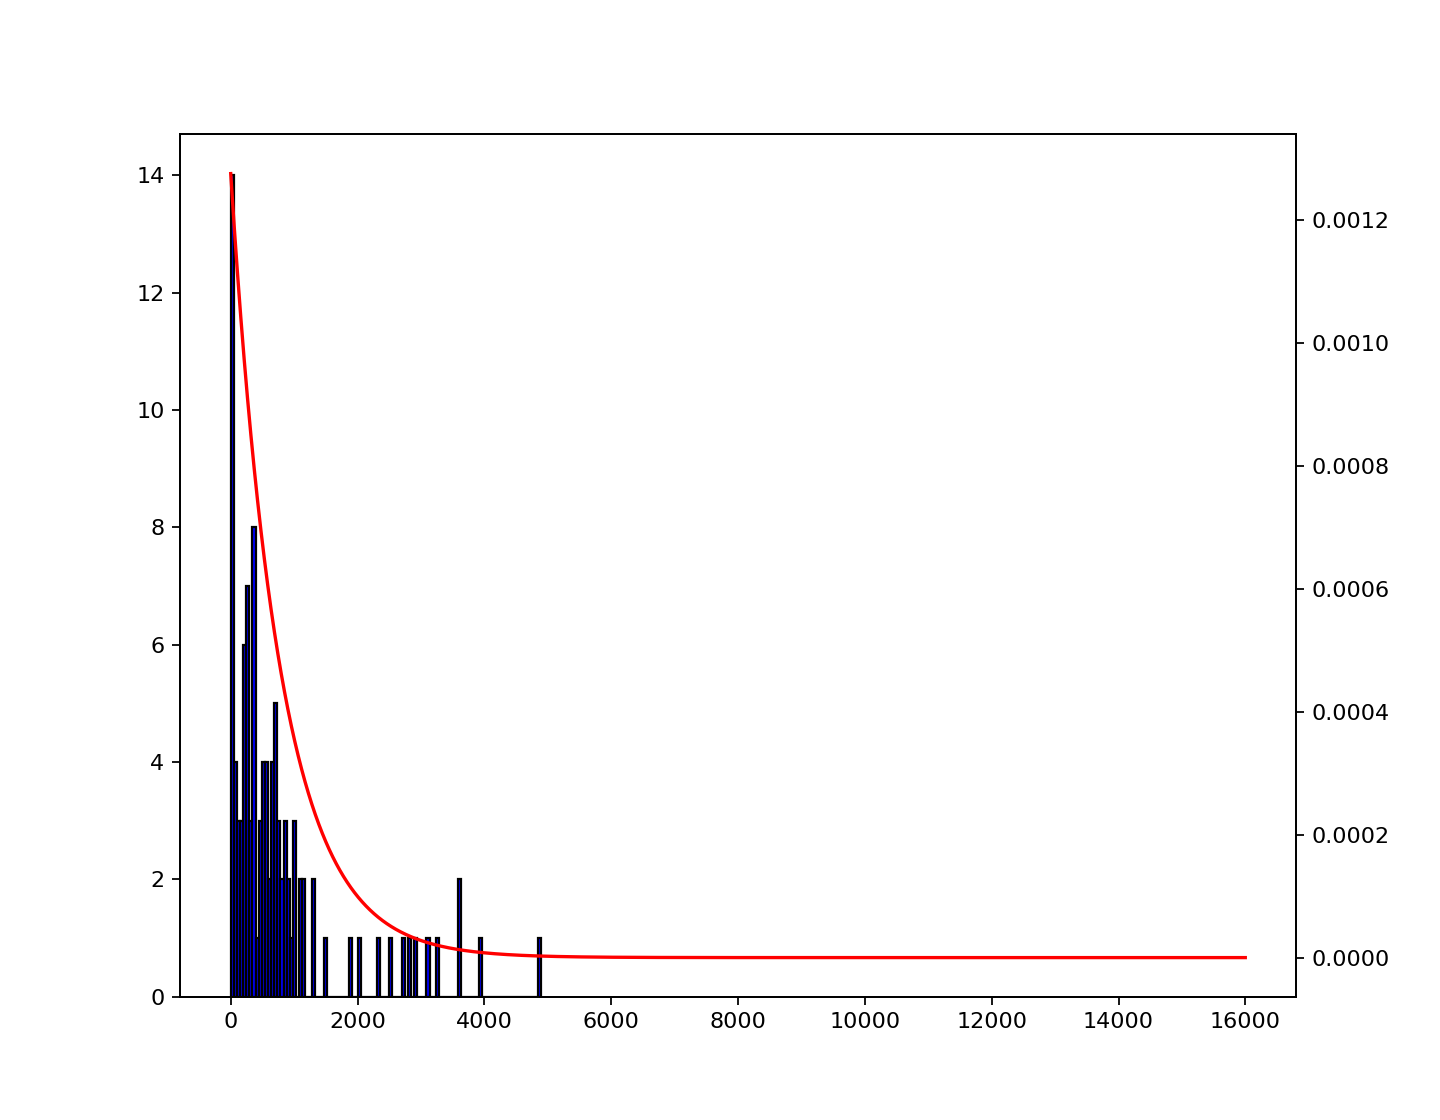

(0.0, 784.152380952381)


In [60]:
# Filtramos deltas de días sobre 5000
dtpo_filtrado = dtpo[dtpo<5000]

# Ajuste de distribución exponencial considerando Estimadores de MV
fig, ax = plt.subplots(1, 1,figsize=(9,7), dpi=80)
ax.hist(dtpo_filtrado, color = 'blue', edgecolor = 'black',bins=100)
ax2 = ax.twinx()
args = stats.expon.fit(dtpo_filtrado)
print(args)
vec = list(range(16000))
pvec = []
for i in vec:
    pvec.append(stats.expon.pdf(x=i,scale=args[1],loc=args[0]))
    
ax2.plot(vec,pvec, color='red')
plt.draw()

In [61]:
datos2 = stats.expon.rvs(*args,size=114)
stats.kstest(dtpo_filtrado, datos2)

KstestResult(statistic=0.0887218045112782, pvalue=0.7380326920776932)

In [ ]:
# FALTA INTERPRETAR

#### Ejercicio 3: 
Considere los datos analizados en la sesión anterior y estudie la posibilidad de ajustarles alguna distribución de probabilidad conocida, incluyendo estimación de parámetros por máxima verosimilitud y  el test de ajuste de k-s respectivo.

In [66]:
data1 = pd.read_csv('data/region1.txt', delimiter= '\t')
data1.head()

,Fecha (UTC),Latitud [º],Longitud [º],Profundidad [km],Magnitud [*]
0,2018-07-02 02:45:32,-37.75,-72.74,40,4.3
1,2018-01-21 14:42:53,-36.07,-73.29,32,4.2
2,2019-09-26 16:36:17,-40.83,-72.29,140,6.0
3,2019-09-05 05:41:29,-36.09,-73.99,20,5.0
4,2018-01-21 18:04:17,-35.98,-73.46,19,4.7


In [85]:
data = data1.iloc[:,3]

<IPython.core.display.Javascript object>


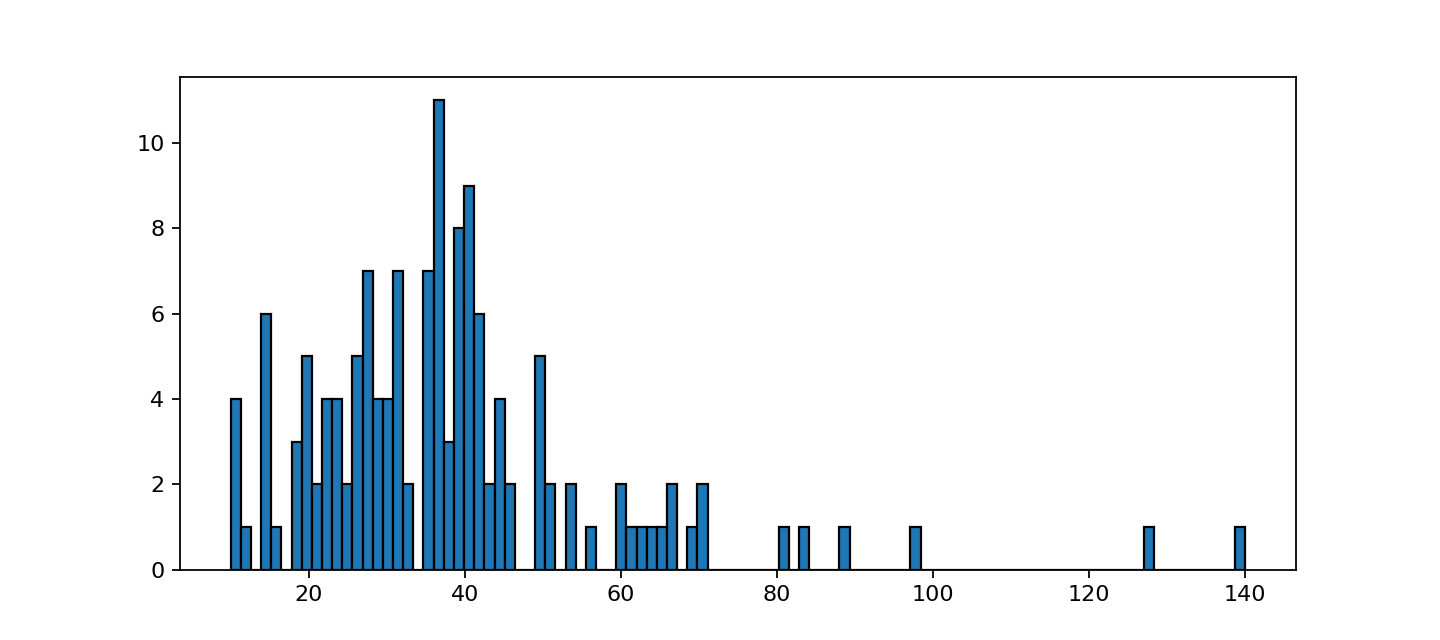

In [86]:
# Histograma de los datos
fig, axs = plt.subplots(1, 1,figsize=(9, 4), dpi=80)
axs.hist(data, edgecolor = 'black', bins = 100)
a = 1

<IPython.core.display.Javascript object>


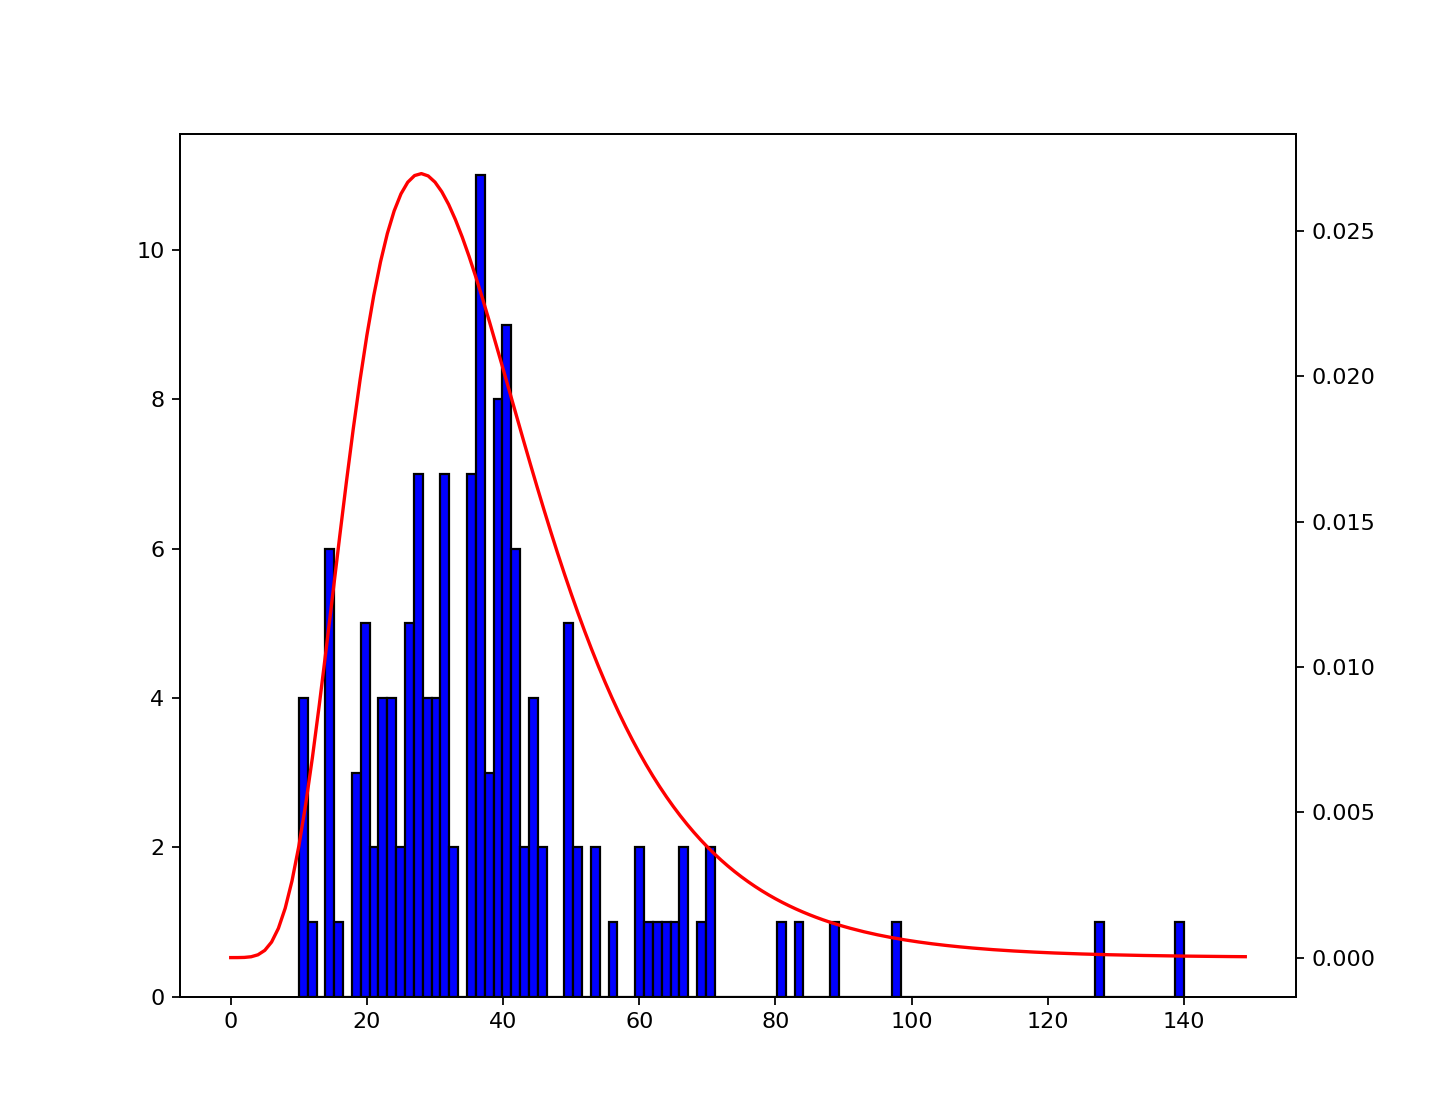

(0.4300734673709573, -3.4005440334025447, 37.708923764145794)


In [90]:
# Ajuste de distribución exponencial considerando Estimadores de MV
fig, ax = plt.subplots(1, 1,figsize=(9,7), dpi=80)
ax.hist(data, color = 'blue', edgecolor = 'black',bins=100)
ax2 = ax.twinx()
args = stats.lognorm.fit(data)
# S, loc, scale
print(args)

vec = list(range(150))
pvec = []
for i in vec:
    pvec.append(stats.lognorm.pdf(x=i,s=args[0],loc=args[1],scale=args[2]))
    
ax2.plot(vec,pvec, color='red')
plt.draw()

In [91]:
# Utilizando un mu diferente al de la distribución original
stats.kstest(data, 'lognorm', args=args)

KstestResult(statistic=0.08300964915835374, pvalue=0.2741609434558103)